In [2]:
import numpy

In [3]:
import pandas

In [42]:
%matplotlib inline

In [44]:
from matplotlib import pyplot as plt
import numpy as np

In [45]:
# each point is length, width, type (0, 1)= red/blue flower

data = [[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5,  1,  1],
        [1,    1,  0]]

mystery_flower = [4.5, 1]

In [53]:
w1=np.random.randn()
w2=np.random.randn()
b=np.random.randn()

In [72]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [82]:
T= np.linspace(-20, 20, 100)
Y= sigmoid(T)


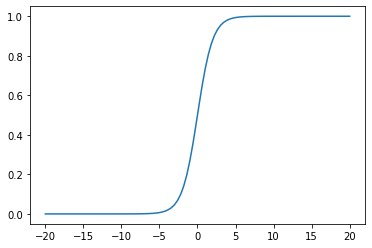

In [83]:
plt.plot(T,Y)

In [85]:
def sigmoid_p(x): #derivative of the sigmoid function
    return sigmoid(x)*(1-sigmoid(x))

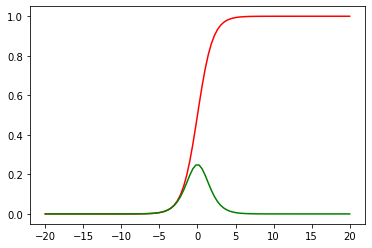

In [86]:
plt.plot(T,sigmoid(T), c='r')
plt.plot(T, sigmoid_p(T), c='g')

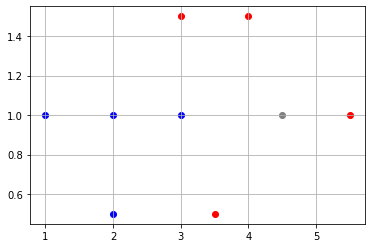

In [112]:
#scatter plot for the given data

plt.grid()

for i in range (len(data)):
    point=data[i]
    color='r'
    if (point[2]==0): #if the data point is blue flower
        color='b'
    plt.scatter(point[0], point[1], c=color)
    
plt.scatter([mystery_flower[0]], [mystery_flower[1]], c='gray')
# also plots the mystery flower, or the flower you need to find
    

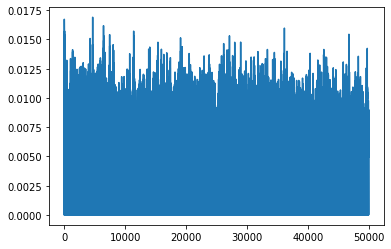

In [103]:
#training loop

learning_rate= 0.2
costs=[]

for i in range(50000):
    ri=np.random.randint(len(data))  
    #picking random index to fetch the data
    
    point=data[ri]
    #fetching the random data points from the train dataset
    
    z= point[0]*w1 + point[1]*w2 +b
    
    predicted= sigmoid(z)
    
    target= point[2] 
    #the target classification in train set
    
    cost= np.square(predicted-target)
    
    costs.append(cost)
    
#     #printing the cost in each iteration to check 
#     if (i%1000==0):
#         print(cost)
    
    dcost_pred= 2* (predicted-target)
    dpred_dz=sigmoid_p(z)
    dz_dw1= point[0]
    dz_dw2= point[1]
    dz_db= 1
    
    dcost_dw1= dcost_pred*dpred_dz*dz_dw1
    dcost_dw2= dcost_pred*dpred_dz*dz_dw2
    dcost_db= dcost_pred*dpred_dz*dz_db
    
    w1=w1-learning_rate*dcost_dw1
    w2=w2-learning_rate*dcost_dw2
    b=b-learning_rate*dcost_db
    
    
plt.plot(costs)

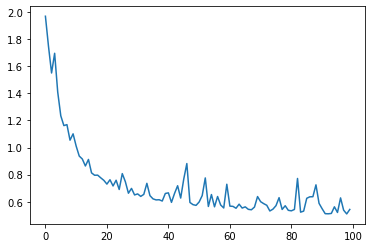

In [109]:
def train():
    #random weights nad biases assigned
    w1 = np.random.randn()
    w2 = np.random.randn()
    b = np.random.randn()
    
    iterations = 10000
    learning_rate = 0.1
    costs = [] # keep costs during training, see if they go down
    
    for i in range(iterations):
        # get a random point
        ri = np.random.randint(len(data))
        point = data[ri]
        
        z = point[0] * w1 + point[1] * w2 + b
        pred = sigmoid(z) # neural network's prediction
        
        target = point[2]
        
        # cost for current random point
        cost = np.square(pred - target)
        
        # record the cost over all data points every 1k iterations
        # basically the Sum of squared errors for current values of w1, w2 and b
        # after the next 1000 iterations, these parameters will be tuned again, therefore you will have another new cost
        if i % 100 == 0:
            c = 0
            for j in range(len(data)):
                p = data[j]
                p_pred = sigmoid(w1 * p[0] + w2 * p[1] + b)
                c += np.square(p_pred - p[2])
                
                
            costs.append(c)
            #after loop runs over all data points and has predictions for each, 
            #record the total sum of squared costs
        
        dcost_dpred = 2 * (pred - target)
        dpred_dz = sigmoid_p(z)
        
        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_db = 1
        
        dcost_dz = dcost_dpred * dpred_dz
        
        dcost_dw1 = dcost_dz * dz_dw1
        dcost_dw2 = dcost_dz * dz_dw2
        dcost_db = dcost_dz * dz_db
        
        #gradient descent
        
        w1 = w1 - learning_rate * dcost_dw1
        w2 = w2 - learning_rate * dcost_dw2
        b = b - learning_rate * dcost_db
        
    return costs, w1, w2, b
        
costs, w1, w2, b = train()

figure = plt.plot(costs)

In [113]:
# we now assume that we have the optimal values of w1, w2 and b

In [114]:
# now we can predict the unknown flower

z= w1* mystery_flower[0] + w2 * mystery_flower[1] + b
pred= sigmoid (z)
print(pred)

0.985674675562315


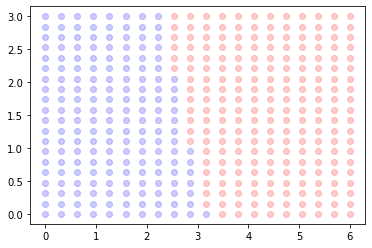

In [115]:
# check out the networks predictions in the x,y plane
for x in np.linspace(0, 6, 20):
    for y in np.linspace(0, 3, 20):
        pred = sigmoid(w1 * x + w2 * y + b)
        c = 'b'
        if pred > .5:
            c = 'r'
        plt.scatter([x],[y],c=c, alpha=.2)

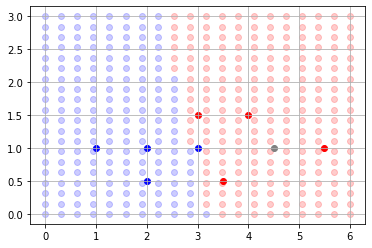

In [116]:
for x in np.linspace(0, 6, 20):
    for y in np.linspace(0, 3, 20):
        pred = sigmoid(w1 * x + w2 * y + b)
        c = 'b'
        if pred > .5:
            c = 'r'
        plt.scatter([x],[y],c=c, alpha=.2)

plt.grid()

for i in range (len(data)):
    point=data[i]
    color='r'
    if (point[2]==0): #if the data point is blue flower
        color='b'
    plt.scatter(point[0], point[1], c=color)
    
plt.scatter([mystery_flower[0]], [mystery_flower[1]], c='gray')
# also plots the mystery flower, or the flower you need to find
    

In [117]:
# So the unknown flower is actually RED (prediction close to 1)

In [ ]:
#Building a more complex neural network

In [118]:
from tensorflow import keras

In [120]:
import tensorflow as tf

In [121]:
import pandas as pd
import numpy as np